<a href="https://colab.research.google.com/github/ParkJongHyeok99/Data_Analysis_Airbnb/blob/main/Data_Analysis_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

google colab 연동 및 데이터 전처리

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

source_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/detailed_listings.csv')

source_data.shape

delete_columns_data = source_data.drop(labels=['listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url',
                                               'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url',
                                               'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
                                               'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'bathrooms', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
                                               'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
                                               'has_availability', 'availability_30', 'availability_60', 'calendar_last_scraped', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
                                               'last_review', 'license', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
                                               'calculated_host_listings_count_shared_rooms', 'reviews_per_month'], axis = 1)       #사용하지 않는 열 제거

delete_columns_data.shape

(38792, 25)

In [3]:
delete_columns_data.head(3)

,id,host_response_time,host_response_rate,host_is_superhost,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,9630344,NaN,NaN,f,Brooklyn,40.68457,-73.91181,Private room,1,1 shared bath,...,364,5,4.8,4.6,5.0,5.0,5.0,4.8,5.0,f
1,3533741,NaN,NaN,f,Manhattan,40.76878,-73.98719,Private room,2,1 bath,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
2,9731039,NaN,NaN,f,Queens,40.74343,-73.91865,Entire home/apt,1,1 bath,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f


In [4]:
delete_columns_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38792 entries, 0 to 38791
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            38792 non-null  int64  
 1   host_response_time            25618 non-null  object 
 2   host_response_rate            25618 non-null  object 
 3   host_is_superhost             38537 non-null  object 
 4   neighbourhood_group_cleansed  38792 non-null  object 
 5   latitude                      38792 non-null  float64
 6   longitude                     38792 non-null  float64
 7   room_type                     38792 non-null  object 
 8   accommodates                  38792 non-null  int64  
 9   bathrooms_text                38750 non-null  object 
 10  bedrooms                      21892 non-null  float64
 11  beds                          38129 non-null  float64
 12  amenities                     38792 non-null  object 
 13  p

In [5]:
#ID 변수인 id값의 중복 여부 체크
n = len(pd.unique(delete_columns_data['id']))
print(n)

38792


In [6]:
#구간 변수 : host_response_rate, latitude , longitude , accommodates, bedrooms, beds, availability_90, availability_365, number_of_reviews, amenities
#구간 변수 : review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value (17개)

#host_response_rate을 numeric으로 변환
delete_columns_data['host_response_rate'] = delete_columns_data['host_response_rate'].str.replace('%', '').astype(float)


#amenities변수를 개수로 변환
delete_columns_data['amenities'] = delete_columns_data['amenities'].apply(lambda x: x.count(','))
delete_columns_data['amenities'].astype(int)
delete_columns_data['amenities'] = delete_columns_data['amenities'] + 1

delete_columns_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38792 entries, 0 to 38791
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            38792 non-null  int64  
 1   host_response_time            25618 non-null  object 
 2   host_response_rate            25618 non-null  float64
 3   host_is_superhost             38537 non-null  object 
 4   neighbourhood_group_cleansed  38792 non-null  object 
 5   latitude                      38792 non-null  float64
 6   longitude                     38792 non-null  float64
 7   room_type                     38792 non-null  object 
 8   accommodates                  38792 non-null  int64  
 9   bathrooms_text                38750 non-null  object 
 10  bedrooms                      21892 non-null  float64
 11  beds                          38129 non-null  float64
 12  amenities                     38792 non-null  int64  
 13  p

In [7]:
delete_columns_data.head(3)

,id,host_response_time,host_response_rate,host_is_superhost,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,9630344,NaN,NaN,f,Brooklyn,40.68457,-73.91181,Private room,1,1 shared bath,...,364,5,4.8,4.6,5.0,5.0,5.0,4.8,5.0,f
1,3533741,NaN,NaN,f,Manhattan,40.76878,-73.98719,Private room,2,1 bath,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
2,9731039,NaN,NaN,f,Queens,40.74343,-73.91865,Entire home/apt,1,1 bath,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f


In [8]:
#구간 변수 결측값 평균으로 대체
#host_response_rate
mean_host_response_rate = delete_columns_data['host_response_rate'].mean()
delete_columns_data['host_response_rate'].fillna(mean_host_response_rate, inplace=True)

#bedrooms
mean_bedrooms = delete_columns_data['bedrooms'].mean()
delete_columns_data['bedrooms'].fillna(mean_bedrooms, inplace=True)

#beds
mean_beds = delete_columns_data['beds'].mean()
delete_columns_data['beds'].fillna(mean_beds, inplace=True)

#beds
mean_beds = delete_columns_data['beds'].mean()
delete_columns_data['beds'].fillna(mean_beds, inplace=True)

#review_scores_rating
mean_review_scores_rating = delete_columns_data['review_scores_rating'].mean()
delete_columns_data['review_scores_rating'].fillna(mean_review_scores_rating, inplace=True)

#review_scores_accuracy
mean_review_scores_accuracy = delete_columns_data['review_scores_accuracy'].mean()
delete_columns_data['review_scores_accuracy'].fillna(mean_review_scores_accuracy, inplace=True)

#review_scores_cleanliness
mean_review_scores_cleanliness = delete_columns_data['review_scores_cleanliness'].mean()
delete_columns_data['review_scores_cleanliness'].fillna(mean_review_scores_cleanliness, inplace=True)

#review_scores_checkin
mean_review_scores_checkin = delete_columns_data['review_scores_checkin'].mean()
delete_columns_data['review_scores_checkin'].fillna(mean_review_scores_checkin, inplace=True)

#review_scores_communication
mean_review_scores_communication = delete_columns_data['review_scores_communication'].mean()
delete_columns_data['review_scores_communication'].fillna(mean_review_scores_communication, inplace=True)

#review_scores_location
mean_review_scores_location = delete_columns_data['review_scores_location'].mean()
delete_columns_data['review_scores_location'].fillna(mean_review_scores_location, inplace=True)

#review_scores_value
mean_review_scores_value = delete_columns_data['review_scores_value'].mean()
delete_columns_data['review_scores_value'].fillna(mean_review_scores_value, inplace=True)

delete_columns_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38792 entries, 0 to 38791
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            38792 non-null  int64  
 1   host_response_time            25618 non-null  object 
 2   host_response_rate            38792 non-null  float64
 3   host_is_superhost             38537 non-null  object 
 4   neighbourhood_group_cleansed  38792 non-null  object 
 5   latitude                      38792 non-null  float64
 6   longitude                     38792 non-null  float64
 7   room_type                     38792 non-null  object 
 8   accommodates                  38792 non-null  int64  
 9   bathrooms_text                38750 non-null  object 
 10  bedrooms                      38792 non-null  float64
 11  beds                          38792 non-null  float64
 12  amenities                     38792 non-null  int64  
 13  p

In [9]:
#범주형 변수 : host_response_time, host_is_superhost, neighbourhood_group_cleansed, room_type, bathrooms_text, instant_bookable, price_B (7개)

#host_is_superhost
delete_columns_data['host_is_superhost'].fillna('f', inplace=True)

#bathrooms_text
delete_columns_data = delete_columns_data.dropna(subset=['bathrooms_text'])

#host_response_time
delete_columns_data['host_response_time'].fillna('a few days or more', inplace=True)

<ipython-input-9-ee67cfce60b9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delete_columns_data['host_response_time'].fillna('a few days or more', inplace=True)


In [16]:
unique_values = delete_columns_data['bathrooms_text'].unique()
print(unique_values)

['1 shared bath' '1 bath' '1 private bath' '2 baths' '2.5 baths'
 '1.5 baths' '4 shared baths' '2 shared baths' '1.5 shared baths'
 'Shared half-bath' 'Half-bath' '3 baths' '3.5 baths' '3 shared baths'
 '4.5 baths' '4 baths' '0 shared baths' '0 baths' '6.5 baths'
 '2.5 shared baths' '5 baths' '6 baths' '7 baths' '15.5 baths'
 'Private half-bath' '5.5 shared baths' '8 baths' '6 shared baths'
 '5.5 baths' '4.5 shared baths' '8.5 baths' '3.5 shared baths']


In [17]:
delete_columns_data['bathrooms_text'] = delete_columns_data['bathrooms_text'].str.replace('1 private bath', '1 bath')
delete_columns_data['bathrooms_text'] = delete_columns_data['bathrooms_text'].str.replace('Shared half-bath', '0.5 shared bath')
delete_columns_data['bathrooms_text'] = delete_columns_data['bathrooms_text'].str.replace('Half-bath', '0.5 bath')
delete_columns_data['bathrooms_text'] = delete_columns_data['bathrooms_text'].str.replace('Private half-bath', '0.5 bath')

In [18]:
unique_values = delete_columns_data['bathrooms_text'].unique()
print(unique_values)

['1 shared bath' '1 bath' '2 baths' '2.5 baths' '1.5 baths'
 '4 shared baths' '2 shared baths' '1.5 shared baths' '0.5 shared bath'
 '0.5 bath' '3 baths' '3.5 baths' '3 shared baths' '4.5 baths' '4 baths'
 '0 shared baths' '0 baths' '6.5 baths' '2.5 shared baths' '5 baths'
 '6 baths' '7 baths' '15.5 baths' '5.5 shared baths' '8 baths'
 '6 shared baths' '5.5 baths' '4.5 shared baths' '8.5 baths'
 '3.5 shared baths']


In [19]:
delete_columns_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38750 entries, 0 to 38791
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            38750 non-null  int64  
 1   host_response_time            38750 non-null  object 
 2   host_response_rate            38750 non-null  float64
 3   host_is_superhost             38750 non-null  object 
 4   neighbourhood_group_cleansed  38750 non-null  object 
 5   latitude                      38750 non-null  float64
 6   longitude                     38750 non-null  float64
 7   room_type                     38750 non-null  object 
 8   accommodates                  38750 non-null  int64  
 9   bathrooms_text                38750 non-null  object 
 10  bedrooms                      38750 non-null  float64
 11  beds                          38750 non-null  float64
 12  amenities                     38750 non-null  int64  
 13  p

타겟 변수 설정

In [20]:
#price 변수 object에서 float로 변환
delete_columns_data['price'] = delete_columns_data['price'].str.replace('[\$,]', '', regex=True).astype(float)

delete_columns_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38750 entries, 0 to 38791
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            38750 non-null  int64  
 1   host_response_time            38750 non-null  object 
 2   host_response_rate            38750 non-null  float64
 3   host_is_superhost             38750 non-null  object 
 4   neighbourhood_group_cleansed  38750 non-null  object 
 5   latitude                      38750 non-null  float64
 6   longitude                     38750 non-null  float64
 7   room_type                     38750 non-null  object 
 8   accommodates                  38750 non-null  int64  
 9   bathrooms_text                38750 non-null  object 
 10  bedrooms                      38750 non-null  float64
 11  beds                          38750 non-null  float64
 12  amenities                     38750 non-null  int64  
 13  p

In [21]:
# 타겟 변수 값이 중위수 이상이면 1, 아니면 0
# 이진값 타겟 변수 price_B
c1 = delete_columns_data['price'] >= delete_columns_data['price'].median()
c0 = delete_columns_data['price'] < delete_columns_data['price'].median()

delete_columns_data.loc[c1, "price_B"] = 1
delete_columns_data.loc[c0, "price_B"] = 0
delete_columns_data.head(3)

,id,host_response_time,host_response_rate,host_is_superhost,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,price_B
0,9630344,a few days or more,92.557264,f,Brooklyn,40.68457,-73.91181,Private room,1,1 shared bath,...,5,4.800000,4.600000,5.000000,5.000000,5.000000,4.80000,5.000000,f,0.0
1,3533741,a few days or more,92.557264,f,Manhattan,40.76878,-73.98719,Private room,2,1 bath,...,0,4.625896,4.740582,4.622926,4.811373,4.805698,4.72422,4.621431,f,0.0
2,9731039,a few days or more,92.557264,f,Queens,40.74343,-73.91865,Entire home/apt,1,1 bath,...,0,4.625896,4.740582,4.622926,4.811373,4.805698,4.72422,4.621431,f,0.0


이상값 제거(구간 변수)

<Axes: xlabel='review_scores_value'>

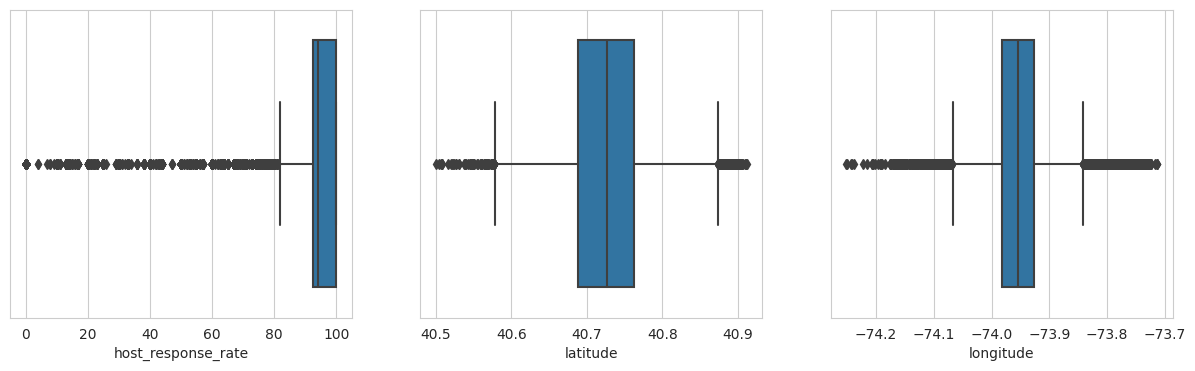

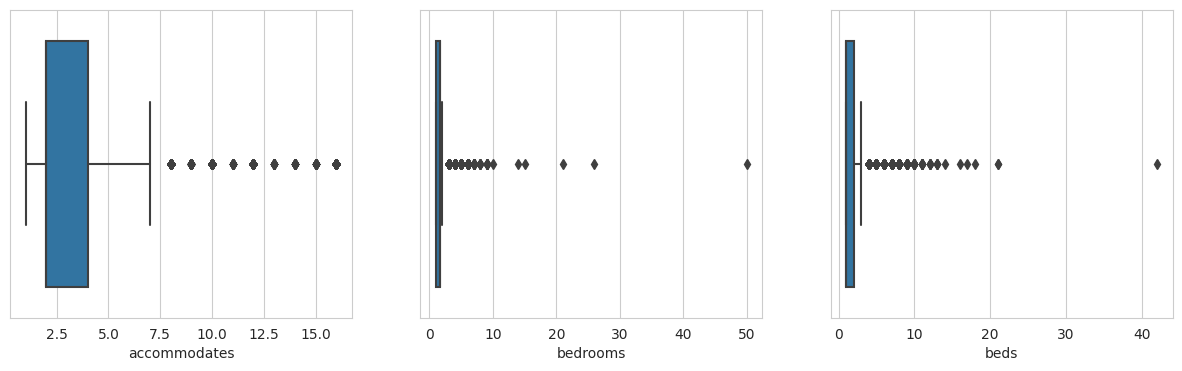

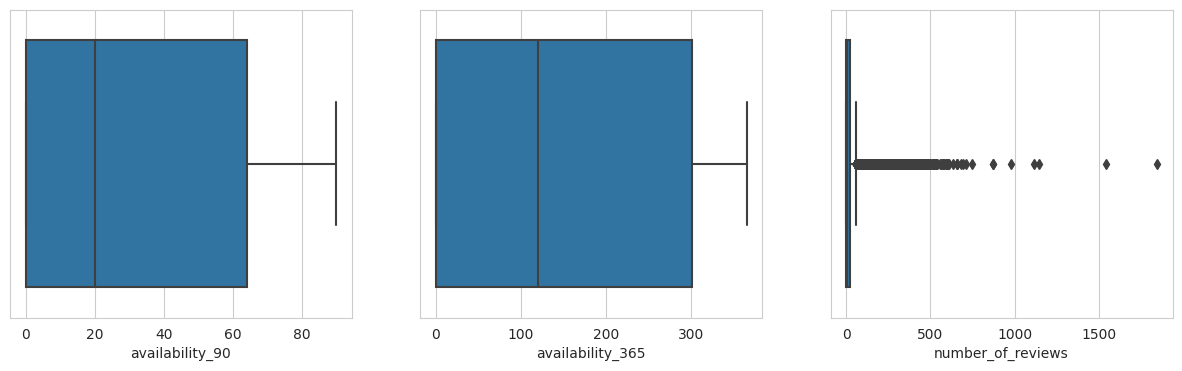

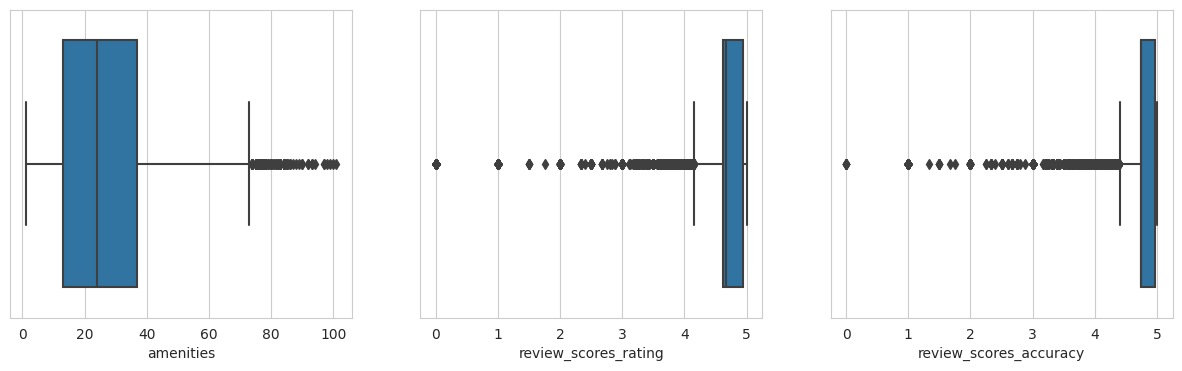

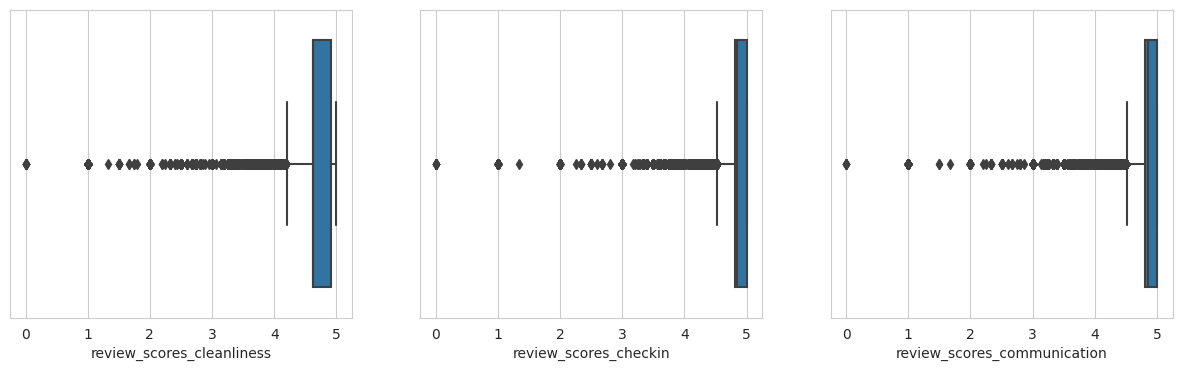

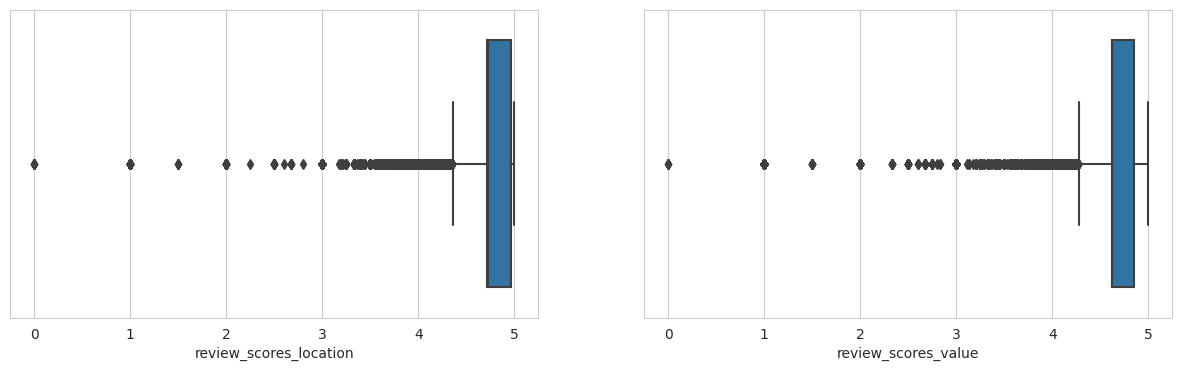

In [22]:
# 구간변수 이상값 확인 및 제거

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'host_response_rate', data = delete_columns_data)
sns.boxplot(ax = axes[1], x = 'latitude', data = delete_columns_data)
sns.boxplot(ax = axes[2], x = 'longitude', data = delete_columns_data)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'accommodates', data = delete_columns_data)
sns.boxplot(ax = axes[1], x = 'bedrooms', data = delete_columns_data)
sns.boxplot(ax = axes[2], x = 'beds', data = delete_columns_data)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'availability_90', data = delete_columns_data)
sns.boxplot(ax = axes[1], x = 'availability_365', data = delete_columns_data)
sns.boxplot(ax = axes[2], x = 'number_of_reviews', data = delete_columns_data)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'amenities', data = delete_columns_data)
sns.boxplot(ax = axes[1], x = 'review_scores_rating', data = delete_columns_data)
sns.boxplot(ax = axes[2], x = 'review_scores_accuracy', data = delete_columns_data)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'review_scores_cleanliness', data = delete_columns_data)
sns.boxplot(ax = axes[1], x = 'review_scores_checkin', data = delete_columns_data)
sns.boxplot(ax = axes[2], x = 'review_scores_communication', data = delete_columns_data)

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'review_scores_location', data = delete_columns_data)
sns.boxplot(ax = axes[1], x = 'review_scores_value', data = delete_columns_data)


In [23]:
#host_response_rate, accommodates, bedrooms, beds의 이상치를 하한값과 상한값으로 대체
#나머지 변수들은 이상치 처리X

Q1 = delete_columns_data[['host_response_rate', 'accommodates', 'bedrooms', 'beds']].quantile(0.25)
Q3 = delete_columns_data[['host_response_rate', 'accommodates', 'bedrooms', 'beds']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

host_response_rate    7.442736
accommodates          2.000000
bedrooms              0.591403
beds                  1.000000
dtype: float64


In [24]:
Lower = Q1 - 1.5 * IQR
Upper = Q3 + 1.5 * IQR
print(Lower)
print(Upper)

host_response_rate    81.393161
accommodates          -1.000000
bedrooms               0.112895
beds                  -0.500000
dtype: float64
host_response_rate    111.164103
accommodates            7.000000
bedrooms                2.478508
beds                    3.500000
dtype: float64


In [25]:
delete_columns_data['host_response_rate'] = delete_columns_data['host_response_rate'].apply(lambda x: 82 if x < 82 else x)
delete_columns_data['accommodates'] = delete_columns_data['accommodates'].apply(lambda x: 7 if x > 7 else x)
delete_columns_data['bedrooms'] = delete_columns_data['bedrooms'].apply(lambda x: 2.478508 if x > 2.478508 else x)
delete_columns_data['beds'] = delete_columns_data['beds'].apply(lambda x: 3.5 if x > 3.5 else x)

In [27]:
delete_columns_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/preprocessing_completed.csv', index = False)

탐색적 자료 분석 및 시각화